In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/content/Customer Churn.csv')

In [ ]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.shape

(7043, 21)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isna().sum().sum()

0

In [ ]:
gender_count=df['gender'].value_counts()
gender_count

,count
gender,
Male,3555
Female,3488


##EDA

In [ ]:
churned_customers=df[df['Churn'] =='Yes']

In [ ]:
churned_by_gender = churned_customers.groupby('gender').size().reset_index(name='Total Churned')

In [ ]:
churned_by_gender

,gender,Total Churned
0,Female,939
1,Male,930


##Insights for customer Churn

Text(0, 0.5, 'Number od Churned Customers')

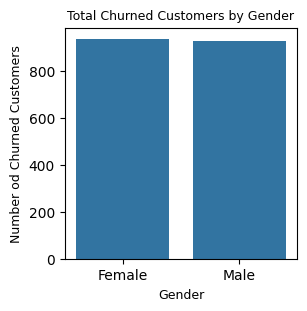

In [ ]:
plt.figure(figsize=(3,3))
sns.barplot(x='gender',y='Total Churned',data=churned_by_gender)
plt.title('Total Churned Customers by Gender',fontsize = 9)
plt.xlabel('Gender',fontsize=9)
plt.ylabel('Number od Churned Customers',fontsize=9)

In [ ]:
churned_by_partner = churned_customers['Partner'].value_counts()

,count
Partner,
No,1200
Yes,669


(-1.0999998037083527,
 1.0999988524410136,
 -1.0999992483942387,
 1.0999999642092495)

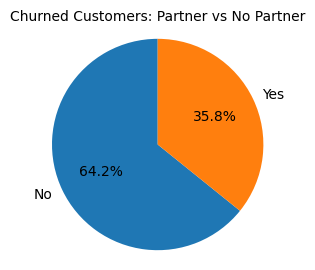

In [ ]:
plt.figure(figsize=(3,3))
plt.pie(churned_by_partner, labels=churned_by_partner.index,autopct='%1.1f%%',startangle=90)
plt.title('Churned Customers: Partner vs No Partner',fontsize=10)
plt.axis('equal')

In [ ]:
payment_count=churned_customers['PaymentMethod'].value_counts()
payment_count

,count
PaymentMethod,
Electronic check,1071
Mailed check,308
Bank transfer (automatic),258
Credit card (automatic),232


([0, 1, 2, 3],
 [Text(0, 0, 'Electronic check'),
  Text(1, 0, 'Mailed check'),
  Text(2, 0, 'Bank transfer (automatic)'),
  Text(3, 0, 'Credit card (automatic)')])

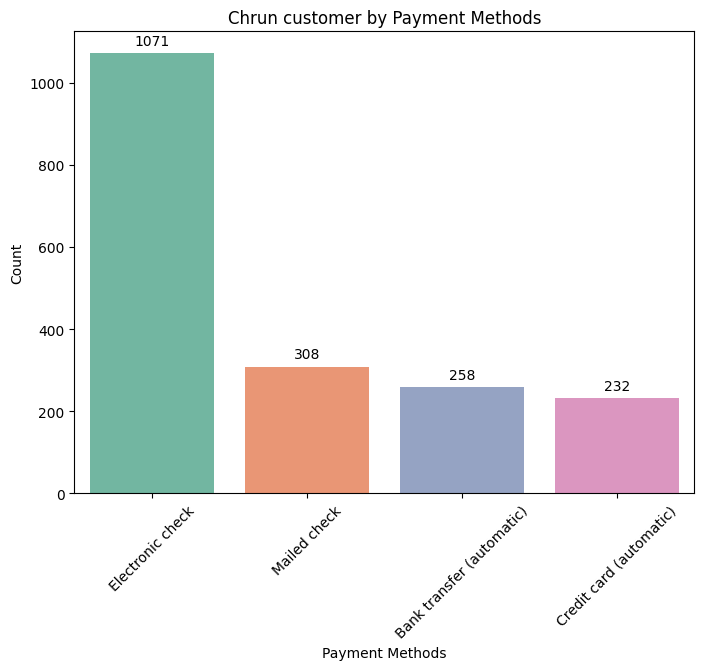

In [ ]:
plt.figure(figsize=(8,6))
ax=sns.barplot(x=payment_count.index , y=payment_count.values,palette='Set2')
for p in ax.patches:
  ax.annotate(f'{int(p.get_height())}',
              (p.get_x()+p.get_width()/2,p.get_height()),
              ha='center' , va='center',
              xytext=(0,9),
              textcoords='offset points')

#ax.bar_label(ax.containers[0])
plt.title('Chrun customer by Payment Methods')
plt.xlabel('Payment Methods')
plt.ylabel('Count')
plt.xticks(rotation=45)

In [ ]:
contract_count = churned_customers['Contract'].value_counts()
contract_count

,count
Contract,
Month-to-month,1655
One year,166
Two year,48


([0, 1, 2],
 [Text(0, 0, 'Month-to-month'),
  Text(1, 0, 'One year'),
  Text(2, 0, 'Two year')])

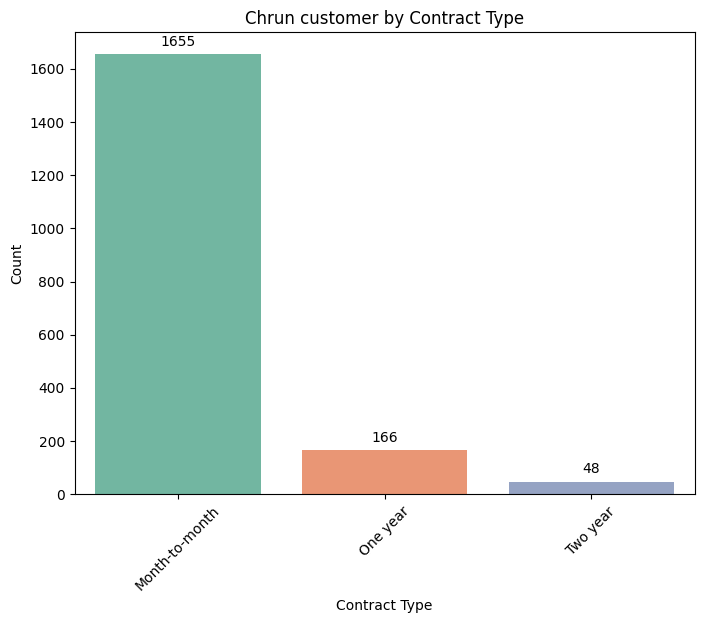

In [ ]:
plt.figure(figsize=(8,6))
ax=sns.barplot(x=contract_count.index , y=contract_count.values,palette='Set2')
for p in ax.patches:
  ax.annotate(f'{int(p.get_height())}',
              (p.get_x()+p.get_width()/2,p.get_height()),
              ha='center' , va='center',
              xytext=(0,9),
              textcoords='offset points')

#ax.bar_label(ax.containers[0])
plt.title('Chrun customer by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.xticks(rotation=45)

In [ ]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [ ]:
churned_customers['tenure'].unique()

array([ 2,  8, 28, 49, 10,  1, 47, 17,  5, 34, 11, 15, 18,  9,  7, 12, 25,
       68, 55, 37,  3, 27, 20,  4, 58, 53, 13,  6, 19, 59, 16, 52, 24, 32,
       38, 54, 43, 63, 21, 69, 22, 61, 60, 48, 40, 23, 39, 35, 56, 65, 33,
       30, 45, 46, 62, 70, 50, 44, 71, 26, 14, 41, 66, 64, 29, 42, 67, 51,
       31, 57, 36, 72])

In [ ]:
bins=[0,6,12,18,24, churned_customers['tenure'].max()]
labels=['0-6 Months','6-12 Months','12-18 Months','18-24 Months','>24 Months']
churned_customers['tenure_group'] = pd.cut(churned_customers['tenure'],bins=bins, labels=labels)

In [ ]:
grouped = churned_customers.groupby('tenure_group').size().reset_index(name='total_churned_customers')
grouped

,tenure_group,total_churned_customers
0,0-6 Months,784
1,6-12 Months,253
2,12-18 Months,177
3,18-24 Months,117
4,>24 Months,538


([0, 1, 2, 3, 4],
 [Text(0, 0, '0-6 Months'),
  Text(1, 0, '6-12 Months'),
  Text(2, 0, '12-18 Months'),
  Text(3, 0, '18-24 Months'),
  Text(4, 0, '>24 Months')])

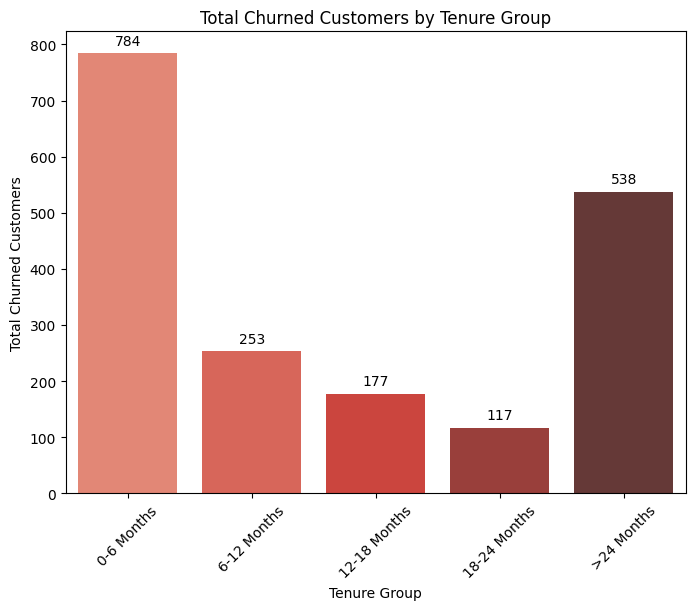

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x='tenure_group' , y='total_churned_customers',data=grouped,palette='Reds_d')
for p in plt.gca().patches:
  plt.gca().annotate(f'{int(p.get_height())}',
              (p.get_x()+p.get_width()/2,p.get_height()),
              ha='center' , va='center',
              xytext=(0,9),
              textcoords='offset points')

#ax.bar_label(ax.containers[0])
plt.title('Total Churned Customers by Tenure Group')
plt.xlabel('Tenure Group')
plt.ylabel('Total Churned Customers')
plt.xticks(rotation=45)

### Key Insights from the Telco Customer Churn Analysis:

1. *Churn by Gender*:
   - The number of churned customers is nearly equal between males and females, indicating gender is not a strong predictor of churn.

2. *Churn by Partner Status*:
   - Customers without partners are more likely to churn compared to those with partners.

3. *Churn by Payment Method*:
   - *Electronic check* is the most common payment method among churned customers. This could suggest that this payment option is linked to higher churn rates.

4. *Churn by Contract Type*:
   - *Month-to-month contracts* have the highest churn rate, while customers with longer-term contracts (one or two years) are less likely to churn. This highlights the value of locking customers into longer contracts.

5. *Churn by Tenure*:
   - Customers with shorter tenures, particularly those who have been with the company for *0-6 months*, have the highest churn rates. Efforts to engage customers early could reduce churn.

These insights can guide targeted interventions, such as offering promotions for long-term contracts or addressing issues specific to electronic check users.